# HousePricesEDA

## 前書き


あなたは、RやPythonと機械学習の基礎についていくつかの経験があります。これは、機械学習のオンラインコースを修了し、優れた競技を試す前にスキルセットを拡大しようとしているデータ科学の学生にとって、完璧な競争です。

### 競争の説明

自宅のバイヤーに自分の夢の家について説明するように依頼してください。おそらく地下の天井の高さや東西鉄道の近くから始まることはありません。  
しかし、この競技場の競技会のデータセットは、寝室の数やホワイトピケットの柵の価格交渉よりもはるかに影響を与えることを証明しています。

アイオワ州のエイムズにある（ほぼ）住宅のあらゆる側面を説明する79の説明変数により、この競争は各家の最終価格を予測することに挑戦します。

### 練習スキル

創造的な機能工学
ランダムフォレストやグラディエントブーストなどの高度な回帰技術

### 謝辞

エイムズ住宅のデータセットは、データサイエンス教育で使用するためにDean De Cockによって編集されました。  
これは、よく引用されているBoston Housingのデータセットの近代化され拡張されたバージョンを探しているデータ科学者のための素晴らしい選択肢です。

このカーネルは、EDAを目的として作業を進めていきます。
作業工程は

①問題の定義。

②訓練データを取得する。

③データを整理し、準備し、浄化する。

④分析し、パターンを特定し、データを探索する。

⑤モデル、予測し、問題を解決する。

⑥問題を解決し、報告し、提示する。
上記の手順で実行していきます。

# ①質問または問題の定義。

まず始めに、ファイルの全体構造をみていきましょう。  
ファイルの中身などはkaggleで確認してください。

また今回の目標はtrainデータで学習できる所まで、データを整えていきたいと思います。  
そして今回のデータには、専門的な用語が数多く存在しますので分からない特徴などはkaggleを確認し、しっかり理解してからEDAに臨みましょう。

# ②訓練データを取得する。

## 必要なライブラリのインポート

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlibをjupyternotebookで動かす際はこちらのコードを実行してください。
import seaborn as sns
pd.set_option('display.max_columns', 100)

これでデータを確認するためのライブラリが揃いました。  
次にデータをインポートしていきましょう。  

# データインポート

In [2]:
train = pd.read_csv("input/all/train.csv")
test = pd.read_csv("input/all/test.csv")

In [3]:
set(train["FireplaceQu"])

{nan, 'Po', 'TA', 'Fa', 'Ex', 'Gd'}

これでデータのインポートができました。  
まず始めに、データの量や特徴量を確認していきましょう。  
もしデータ量を確認せず特徴を順番に確認してしまうと時間がかかってしまうこともあります。  
まずはデータ全体から問題を洗い出すことが大切です。  
では実際にデータを確認していきましょう。  

# ③データを整理し、準備し、浄化する。

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train.shape,test.shape

((1460, 81), (1459, 80))

データを確認しまず考える事は、どうすれば学習できる形になるかを考えることです。
まず始めにデータを確認し欠損値がある事に気がつきました。  
実際に欠損がどのくらいあるのか確認していきましょう。

## 欠損の確認

In [7]:
train_null  = train.isnull().sum().sort_values()[::-1]
train_null[:20].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical', 'Utilities'],
      dtype='object')

In [8]:
train_null[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

欠損の多いデータが沢山あることが確認できました   
ただこれでは分かりにくいので、どのくらいが欠損値なのか可視化していきましょう。

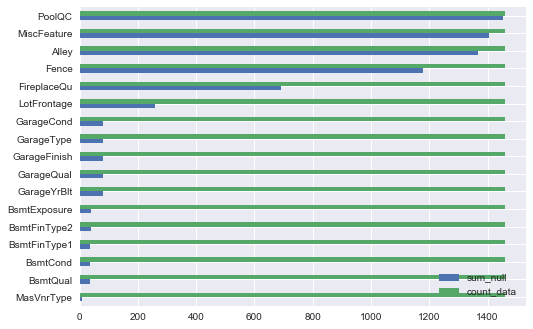

In [9]:
train_null = pd.DataFrame(train_null)
train_null["count_data"] = 1459
train_null.columns=["sum_null","count_data"]
train_null_sorted=train_null.sort_values(by="sum_null",ascending=False)
train_null_sorted[:17][::-1].plot.barh()

上記で欠損の数を確認していきましょう。  
プールの質など欠損の数が多い特徴やガレージ情報など少しだけ欠損がある特徴など様々な特徴に欠損があることが確認できました。  

それでは次に欠損をどのように処理して行くべきか、考えていきましょう。  

方法は様々で平均や最小値を代入する場合やK近傍法でNan値を予測したり欠損のある行や列を削除して対処することもあります。  
実際にkaggleで上位入賞を狙う場合は様々なモデルを試すことになるので、データの傾向を把握してからNan値の処理をする必要があります。  
その場合、”なぜ欠損しているのか？”を考えることが重要です。  
欠損は完全にランダムなのか？もしくは意図的な欠損では無いのか？欠損が大半を占めていないか？など様々な状況に応じて欠損を処理することになります。 

また今回のようにデータ数の少ない時に欠損を削除してしまうと偏りが出やすくなってしまうので注意が必要です。  
では欠損の状態を確認していきましょう！

In [10]:
train[np.array(train_null[:20].index)].head(10)

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageCond,GarageType,GarageYrBlt,GarageFinish,GarageQual,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,MasVnrType,Electrical,Utilities
0,NaN,NaN,NaN,NaN,NaN,65.0,TA,Attchd,2003.0,RFn,TA,No,Unf,GLQ,TA,Gd,196.0,BrkFace,SBrkr,AllPub
1,NaN,NaN,NaN,NaN,TA,80.0,TA,Attchd,1976.0,RFn,TA,Gd,Unf,ALQ,TA,Gd,0.0,None,SBrkr,AllPub
2,NaN,NaN,NaN,NaN,TA,68.0,TA,Attchd,2001.0,RFn,TA,Mn,Unf,GLQ,TA,Gd,162.0,BrkFace,SBrkr,AllPub
3,NaN,NaN,NaN,NaN,Gd,60.0,TA,Detchd,1998.0,Unf,TA,No,Unf,ALQ,Gd,TA,0.0,None,SBrkr,AllPub
4,NaN,NaN,NaN,NaN,TA,84.0,TA,Attchd,2000.0,RFn,TA,Av,Unf,GLQ,TA,Gd,350.0,BrkFace,SBrkr,AllPub
5,NaN,Shed,NaN,MnPrv,NaN,85.0,TA,Attchd,1993.0,Unf,TA,No,Unf,GLQ,TA,Gd,0.0,None,SBrkr,AllPub
6,NaN,NaN,NaN,NaN,Gd,75.0,TA,Attchd,2004.0,RFn,TA,Av,Unf,GLQ,TA,Ex,186.0,Stone,SBrkr,AllPub
7,NaN,Shed,NaN,NaN,TA,NaN,TA,Attchd,1973.0,RFn,TA,Mn,BLQ,ALQ,TA,Gd,240.0,Stone,SBrkr,AllPub
8,NaN,NaN,NaN,NaN,TA,51.0,TA,Detchd,1931.0,Unf,Fa,No,Unf,Unf,TA,TA,0.0,None,FuseF,AllPub
9,NaN,NaN,NaN,NaN,TA,50.0,TA,Attchd,1939.0,RFn,Gd,No,Unf,GLQ,TA,TA,0.0,None,SBrkr,AllPub


まず始めに欠損の一番多いプール情報を見てみましょう。  
こちらのデータはプールが無い家は欠損扱いになっており、ある家はランク付けされたカテゴリ変数が入っています。  
このカテゴリ変数を数値変数に置き換え欠損に0を代入していきましょう！

In [11]:
train["PoolQC"] = train["PoolQC"].map({np.nan:0,"Fa":1,"Gd":2,"Ex":3})
test["PoolQC"] =test["PoolQC"].map({np.nan:0,"Fa":1,"Gd":2,"Ex":3})

次にフェンスの情報を見ていきます。  
フェンスの情報にはフェンスのグレードがランク付けされカテゴリ変数として入っており、フェンスの無い家は欠損値が代入されています。  
こちらもカテゴリ変数を数値変数に置き換え欠損に0を代入していきましょう！

In [12]:
train["Fence"] = train["Fence"].map({np.nan:0,"MnWw":1,"GdWo":2,"MnPrv":3,"GdPrv":4})
test["Fence"] = test["Fence"].map({np.nan:0,"MnWw":1,"GdWo":2,"MnPrv":3,"GdPrv":4})

これでフェンスの特徴にある欠損の処理ができました。  
次に家の近くにある路地の舗装状態を見ていきましょう。  
こちらの特徴も道が無い場合は欠損になっています。  
またこちらは後ほどカテゴリ変数を直していきますので、今は欠損の処理だけ行います。  

In [13]:
train["Alley"] = train["Alley"].fillna("No access")
test["Alley"] = test["Alley"].fillna("No access")

次にカテゴリには無い情報が載っている特徴の欠損処理を行いましょう。  
この特徴にはエレベーターが付いていることやテニスコートがあるなど項目にない情報が載ってます。  
こちらも後ほどカテゴリ変数を直していきますので、今は欠損の処理だけ行います。  

In [14]:
train["MiscFeature"] = train["MiscFeature"].fillna("No")
test["MiscFeature"] = test["MiscFeature"].fillna("No")

FireplaceQuは暖炉の質を表す特徴です。  
これはなぜ欠損になっているか確認するために、まずFireplacesという名前の暖炉の数を表す特徴が存在しますので、そちらも確認していきましょう。  
私の予想では、暖炉が無い家が欠損になっていると考えています。

In [15]:
((train["Fireplaces"] == 0) * 1).sum()

690

暖炉の無い家数が690件だとわかりました。  
これはFireplaceQuの欠損数と一緒なので、暖炉の無い家に欠損がある事が確認できました。  
それでは欠損を0に変え、暖炉の質が書いてあるカテゴリ変数をランク付けし数値変数に変えましょう。  
またカテゴリ変数の説明はkaggleをご確認ください。

In [16]:
train["FireplaceQu"] = train["FireplaceQu"].map(
    {np.nan:0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})

test["FireplaceQu"] = test["FireplaceQu"].map(
    {np.nan:0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})


これで"FireplaceQu"にあった欠損の処理をする事ができました。  

次にLotFrontageの欠損内容を確認していきましょう。  
これは家から道路までの距離です。

In [17]:
train["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

一番近くても２１フィート以内がありません。  
これは私の推測ですが、道路に接してる家に関してはNaNが入っているのでは無いでしょうか？  
これが正しいかはわかりませんが、今回は0を代入したいと思います。

In [18]:
train["LotFrontage"] = train["LotFrontage"].fillna(0)

test["LotFrontage"] = test["LotFrontage"].fillna(0)

これで"LotFrontage"の欠損処理が終わりました。  
次にガレージ情報の欠損処理を行っていきましょう。  
欠損のあるガレージ情報は全部で5つ特徴があります。  
これはkaggleにガレージが無い場合はNanになってるとの記述がありましたので、各特徴のテゴリ変数をランク付けし数値変数に変えましょう。  
またランク付け出来ない特徴は後ほど処理しますので、今はそのままにしておきます。

In [19]:
train["GarageType"] = train["GarageType"].fillna("No Garage")
test["GarageType"] = test["GarageType"].fillna("No Garage")

In [20]:
train["GarageCond"] = train["GarageCond"].map(
    {np.nan:0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})

test["GarageCond"] = test["GarageCond"].map(
    {np.nan:0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})

In [21]:
train["GarageYrBlt"] = train["GarageYrBlt"].fillna(0)
test["GarageYrBlt"] = test["GarageYrBlt"].fillna(0)

In [22]:
train["GarageFinish"] = train["GarageFinish"].fillna("No Garage")

test["GarageFinish"] = test["GarageFinish"].fillna("No Garage")

In [23]:
train["GarageQual"] = train["GarageQual"].map(
    {np.nan:0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})

test["GarageQual"] = test["GarageQual"].map(
    {np.nan:0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})

これでガレージ情報の欠損処理が終わりました。  
次に地下の情報の欠損処理をしていきましょう。  
欠損のある地下の情報は全部で5つ特徴があります。  
これらも今までの手順で処理していきましょう。

In [24]:
train["BsmtExposure"] = train["BsmtExposure"].map(
    {np.nan:0,"No":1,"Mn":2,"Av":3,"Gd":4})

test["BsmtExposure"] = test["BsmtExposure"].map(
    {np.nan:0,"No":1,"Mn":2,"Av":3,"Gd":4})

In [25]:
train["BsmtFinType2"] = train["BsmtFinType2"].map(
    {np.nan:0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6})

test["BsmtFinType2"] = test["BsmtFinType2"].map(
    {np.nan:0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6})

In [26]:
train["BsmtFinType1"] = train["BsmtFinType1"].map(
    {np.nan:0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6})

test["BsmtFinType1"] = test["BsmtFinType1"].map(
    {np.nan:0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6})

In [27]:
train["BsmtCond"] = train["BsmtCond"].map(
    {np.nan:0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})

test["BsmtCond"] = test["BsmtCond"].map(
    {np.nan:0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})

In [28]:
train["BsmtQual"] = train["BsmtQual"].map(
    {np.nan:0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})

test["BsmtQual"] = test["BsmtQual"].map(
    {np.nan:0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})

これで地下室の欠損処理が終わりました。  
もう少しで欠損処理が終わるので、頑張っていきましょう!
次は石積模様の情報がある特徴の欠損処理を行います。  
欠損がある２種類の特徴を処理していきましょう。

In [29]:
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)

test["MasVnrArea"] = test["MasVnrArea"].fillna(0)

In [30]:
train["MasVnrType"] = train["MasVnrType"].fillna("None")

test["MasVnrType"] = test["MasVnrType"].fillna("None")

これで石積模様の欠損処理が終わりました。
次で最後です！　　
最後に電気システムの欠損を処理していきましょう！  
この欠損は1つしか無いので情報が入らなかった可能性があると考えてます。  
またこの電気システムはランク付けしにくいので欠損を新たな変数として処理します。  
現段階では欠損値(Nan)に文字列を代入して対応します。

In [31]:
train["Electrical"] = train["Electrical"].fillna("Na")
test["Electrical"] = test["Electrical"].fillna("Na")

お疲れ様です！  
これで欠損の処理は全て終わりました。  
念のため図で欠損が無いかを確認しておきましょう！

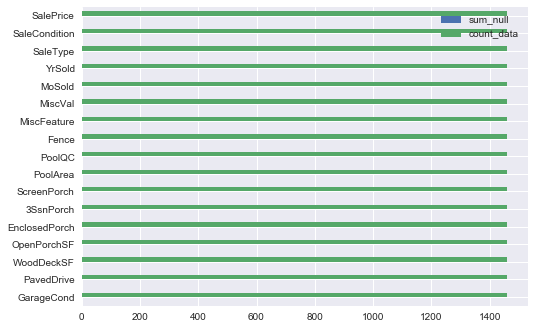

In [32]:
train_null  = train.isnull().sum().sort_values()[::-1]
train_null = pd.DataFrame(train_null)
train_null["count_data"] = 1459
train_null.columns=["sum_null","count_data"]
train_null_sorted=train_null.sort_values(by="sum_null",ascending=False)
train_null_sorted[:17][::-1].plot.barh()

In [33]:
train_null_sorted

,sum_null,count_data
SalePrice,0,1459
SaleCondition,0,1459
SaleType,0,1459
YrSold,0,1459
MoSold,0,1459
MiscVal,0,1459
MiscFeature,0,1459
Fence,0,1459
PoolQC,0,1459
PoolArea,0,1459


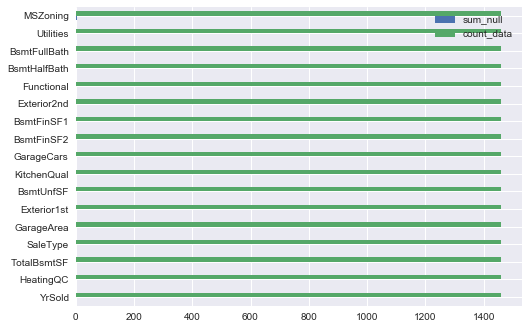

In [34]:
test_null  = test.isnull().sum().sort_values()[::-1]
test_null = pd.DataFrame(test_null)
test_null["count_data"] = 1459
test_null.columns=["sum_null","count_data"]
test_null_sorted=test_null.sort_values(by="sum_null",ascending=False)
test_null_sorted[:17][::-1].plot.barh()

In [35]:
test_null

,sum_null,count_data
MSZoning,4,1459
Functional,2,1459
Utilities,2,1459
BsmtFullBath,2,1459
BsmtHalfBath,2,1459
TotalBsmtSF,1,1459
SaleType,1,1459
GarageArea,1,1459
Exterior1st,1,1459
BsmtUnfSF,1,1459


なんとtrainデータに欠損がなくtestデータに欠損があるものがありました。
最後にtestデータに残った欠損を処理していきましょう！

In [36]:
for col in test:
    if test[col].dtype == "object":
        test[col] = test[col].fillna("None")
    
    elif test[col].dtype == "int64" or test[col].dtype == "float64":
        test[col] = test[col].fillna(test[col].mean())

        
    

In [37]:
test_null  = test.isnull().sum().sort_values()[::-1]
test_null = pd.DataFrame(test_null)
test_null["count_data"] = 1459

In [38]:
test_null

,0,count_data
SaleCondition,0,1459
SaleType,0,1459
RoofStyle,0,1459
RoofMatl,0,1459
Exterior1st,0,1459
Exterior2nd,0,1459
MasVnrType,0,1459
MasVnrArea,0,1459
ExterQual,0,1459
ExterCond,0,1459


In [39]:
test_null.isnull().any()

0             False
count_data    False
dtype: bool

これで全ての欠損が無いことが確認できました！

## データのランク付け

次はデータの中にランク付けされている特徴がカテゴリ変数で入っています。  
その特徴を一つづ数値変数に変えていきましょう！

In [40]:
train["ExterQual"] = train["ExterQual"].map({"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4})
test["ExterQual"] = test["ExterQual"].map({"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4})

In [41]:
train["ExterCond"] = train["ExterCond"].map({"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4})
test["ExterCond"] = test["ExterCond"].map({"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4})

In [42]:
train["HeatingQC"] = train["HeatingQC"].map({"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4})
test["HeatingQC"] = test["HeatingQC"].map({"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4})

In [43]:
train["KitchenQual"] = train["KitchenQual"].map({"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4})
test["KitchenQual"] = test["KitchenQual"].map({"None":1,"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4})

In [44]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706,1,0,150,856,GasA,4,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,3,8,Typ,0,0,Attchd,2003.0,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,0,No,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4,3,4,5,978,1,0,284,1262,GasA,4,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,2,6,Typ,1,3,Attchd,1976.0,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,0,No,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,4,3,2,6,486,1,0,434,920,GasA,4,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,3,6,Typ,1,3,Attchd,2001.0,RFn,2,608,3,3,Y,0,42,0,0,0,0,0,0,No,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2,2,BrkTil,3,4,1,5,216,1,0,540,756,GasA,3,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,3,7,Typ,1,4,Detchd,1998.0,Unf,3,642,3,3,Y,0,35,272,0,0,0,0,0,No,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,4,3,3,6,655,1,0,490,1145,GasA,4,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,3,9,Typ,1,3,Attchd,2000.0,RFn,3,836,3,3,Y,192,84,0,0,0,0,0,0,No,0,12,2008,WD,Normal,250000


trainデータを見てみると文字列（カテゴリ変数）があることに気がつきました。
カテゴリ変数の特徴が混じっていては、基本的なモデルでの学習ができません。
実際にどの特徴がカテゴリ変数なのか確認していきます。
またその際kaggleをみて変数の意味も一緒に確認していきましょう。

In [45]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual          int64
ExterCond          int64
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual        int64
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu        int64
GarageType        object
GarageYrBlt      float64


オブジェクト型の特徴が混ざっていることが確認できました。  
見やすいように可視化していきましょう！  

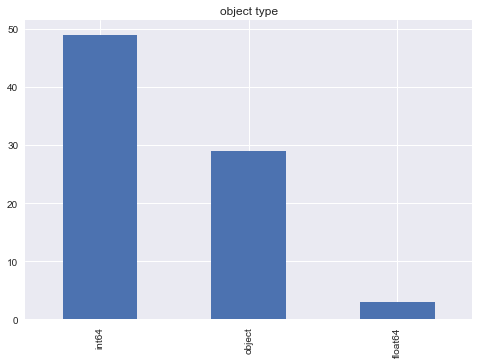

In [46]:
train.dtypes.value_counts().plot.bar()
plt.title("object type")
plt.show()

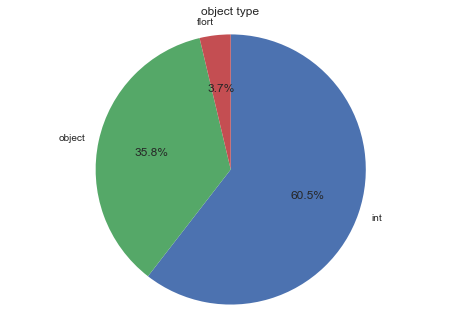

In [47]:
plt.title("object type")
plt.pie(train.dtypes.value_counts(), labels=["int","object","flort"], counterclock=False, startangle=90 , autopct="%1.1f%%")
plt.axis('equal')
plt.show()


これは驚きました！  
全体の半分以上にカテゴリ変数が含まれてることがわかりました。  
これでは学習することが出来ません。

この問題を解決するためにラベルエンコーダーとダミー変数を使っていきます。
ラベルエンコーダーは文字列に番号を割り当てていく手法です。
ダミー変数とはその文字列の名前を特徴として追加し、該当するものに１そうでないものを0にします。
このダミー変数は文字列の種類だけ特徴が増えます。
今回は性別など２種類しかないものだけラベルエンコーダーを採用し、カテゴリ変数の種類が複数存在する特徴に対してはダミー変数を使用します。

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def les(data):
    
    for col in data:
        if data[col].dtype == "object":
            if len(list(data[col].unique())) <= 2:
                le.fit(data[col])            
                data[col] = le.transform(data[col])
                
    data = pd.get_dummies(data)
    return data

この関数で、カテゴリ変数の種類が２つ以下の特徴にだけラベルエンコーダが適用され、カテゴリ変数の種類が3つ以上の特徴にはダミー変数が適用される関数を作ることができました。  
実際にこの関数を使いカテゴリ変数を数値変数に変えていきましょう。


In [49]:
train = les(train)
test = les(test)

In [50]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,...,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_Na,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_Fin,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_No,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,1,0,7,5,2003,2003,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,856,854,0,1710,1,0,2,1,3,1,3,8,0,0,2003.0,2,548,3,3,0,61,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,1,0,6,8,1976,1976,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1,1262,0,0,1262,0,1,2,0,3,1,2,6,1,3,1976.0,2,460,3,3,298,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,1,0,7,5,2001,2002,162.0,3,2,4,3,2,6,486,1,0,434,920,4,1,920,866,0,1786,1,0,2,1,3,1,3,6,1,3,2001.0,2,608,3,3,0,42,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,1,0,7,5,1915,1970,0.0,2,2,3,4,1,5,216,1,0,540,756,3,1,961,756,0,1717,1,0,1,0,3,1,3,7,1,4,1998.0,3,642,3,3,0,35,272,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,1,0,8,5,2000,2000,350.0,3,2,4,3,3,6,655,1,0,490,1145,4,1,1145,1053,0,2198,1,0,2,1,4,1,3,9,1,3,2000.0,3,836,3,3,192,84,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


全てのカテゴリ変数を数値変数に変えることができました！  
これで学習できる形になったので学習していきましょう！

In [51]:
y_train = train["SalePrice"]
train1 = train.drop(set(train.columns) - set(test.columns),axis = 1)
test1 = test.drop(set(test.columns) - set(train.columns),axis = 1)

# ⑤モデル、予測し、問題を解決する。

In [52]:
# from sklearn.model_selection import KFold
# from sklearn.metrics import roc_auc_score
# import lightgbm as lgb
# import gc

# model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)



In [53]:
# y_train = train["SalePrice"]

# model_lgb.fit(train1, y_train)
# lgb_train_pred = model_lgb.predict(test1)
# lgb_pred = np.expm1(model_lgb.predict(test1.values))
# #print(rmsle(y_train, lgb_train_pred))


In [54]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import gc

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [55]:
def RMSE(true,pred):
       log_true = np.log(list(true))
       log_pred = np.log(list(pred))
       return np.sqrt(mean_squared_error(log_true, log_pred))

In [56]:
model_lgb.fit(train1, y_train)
lgb_train_pred = model_lgb.predict(train1)
lgb_pred = np.expm1(model_lgb.predict(test1.values))
print(RMSE(y_train, lgb_train_pred))

0.086219621237


/Users/hiroshi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in expm1
  app.launch_new_instance()


In [57]:
pd.DataFrame(lgb_train_pred)

,0
0,203194.287490
1,179105.262149
2,214812.811489
3,167370.108688
4,283689.196240
5,157050.653110
6,287767.249696
7,202463.728577
8,136517.212420
9,128148.140425


In [58]:
pre = model_lgb.predict(test1.values)

In [59]:
submission = pd.DataFrame(test1["Id"].astype("int"))
submission["SalePrice"] = pre

In [60]:
submission

,Id,SalePrice
0,1461,124547.743612
1,1462,164766.870541
2,1463,184172.476928
3,1464,194657.877748
4,1465,199283.065170
5,1466,172169.036568
6,1467,182512.756851
7,1468,163779.562321
8,1469,180463.407499
9,1470,123836.189658


In [61]:
test.shape

(1459, 230)

In [62]:
submission.to_csv('submission.csv', index = False)